In [ ]:
from google.cloud import bigquery as bq

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
conn = bq.Client.from_service_account_json("case.json")

# Change-Over-Time

#### What is it?
"Change-Over-Time" refers to tracking and analyzing how key metrics evolve day by day. It focuses on observing trends in user behavior, product engagement, and financial performance.

#### Why is it important?
Understanding how metrics like installs, sessions, revenue, and marketing costs change over time allows us to:
- Monitor product growth or decline
- Detect anomalies or seasonal patterns
- Evaluate the impact of marketing campaigns or product updates
- Make informed decisions based on real user activity and spending behavior

#### How is it measured?
Based on the provided SQL queries:

- **Daily Installs** (`query_cot_1`): Counts unique users who installed the app each day.
- **Daily Level Ends** (`query_cot_2`): Measures how often players complete or exit levels on a daily basis.
- **Daily Sessions** (`query_cot_3`): Tracks the number of user sessions each day, indicating engagement frequency.
- **Daily Revenue** (`query_cot_4`): Sums up daily in-app purchases to monitor monetization.
- **Daily Marketing Cost** (`query_cot_5`): Aggregates daily ad spend to analyze acquisition investment.

Each metric is grouped by date to generate a time series that can be visualized and interpreted for trend analysis.


In [ ]:
query_cot_1 = """
-- Calculate the number of unique installs per day
-- Used for time series analysis of user acquisition trends

SELECT
  DATE(event_time) AS install_date,              -- Extract the date from the event timestamp
  COUNT(DISTINCT user_id) AS daily_installs      -- Count of unique users who installed on each date
FROM `case_db.q1_table_install`
GROUP BY install_date
ORDER BY install_date;
"""

In [ ]:
 df_cot_1 = conn.query(query_cot_1).to_dataframe()

In [ ]:
df_cot_1.head()

,install_date,daily_installs
0,2021-04-30,1064
1,2021-05-01,9177
2,2021-05-02,8803
3,2021-05-03,6127
4,2021-05-04,6467


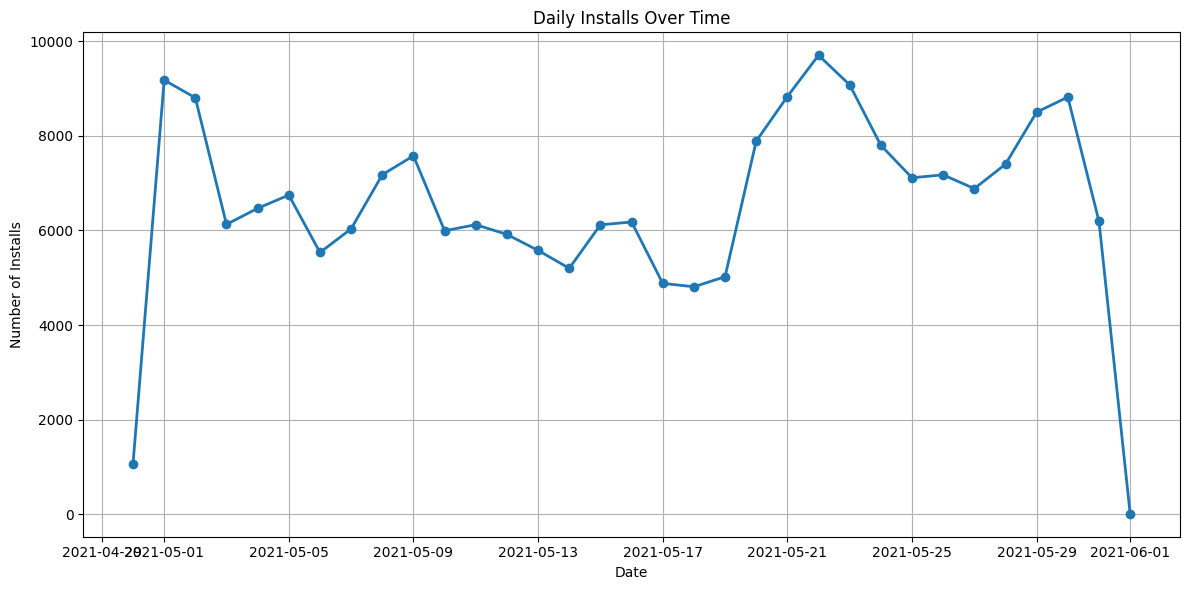

In [ ]:
# Convert 'install_date' column to datetime and set it as the DataFrame index for time series plotting
df_cot_1['install_date'] = pd.to_datetime(df_cot_1['install_date'])
df_cot_1.set_index('install_date', inplace=True)

# Plot daily installs as a time series
plt.figure(figsize=(12, 6))
plt.plot(df_cot_1.index, df_cot_1['daily_installs'], marker='o', linewidth=2)
plt.title('Daily Installs Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Installs')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
query_cot_2 = """
SELECT
  DATE(event_time) AS level_end_date,
  COUNT(*) AS daily_level_ends
FROM `case_db.q1_table_level_end`
GROUP BY level_end_date
ORDER BY level_end_date;
"""

In [ ]:
 df_cot_2 = conn.query(query_cot_2).to_dataframe()

In [ ]:
df_cot_2.head()

,level_end_date,daily_level_ends
0,2021-04-30,16077
1,2021-05-01,336360
2,2021-05-02,553376
3,2021-05-03,644212
4,2021-05-04,644176


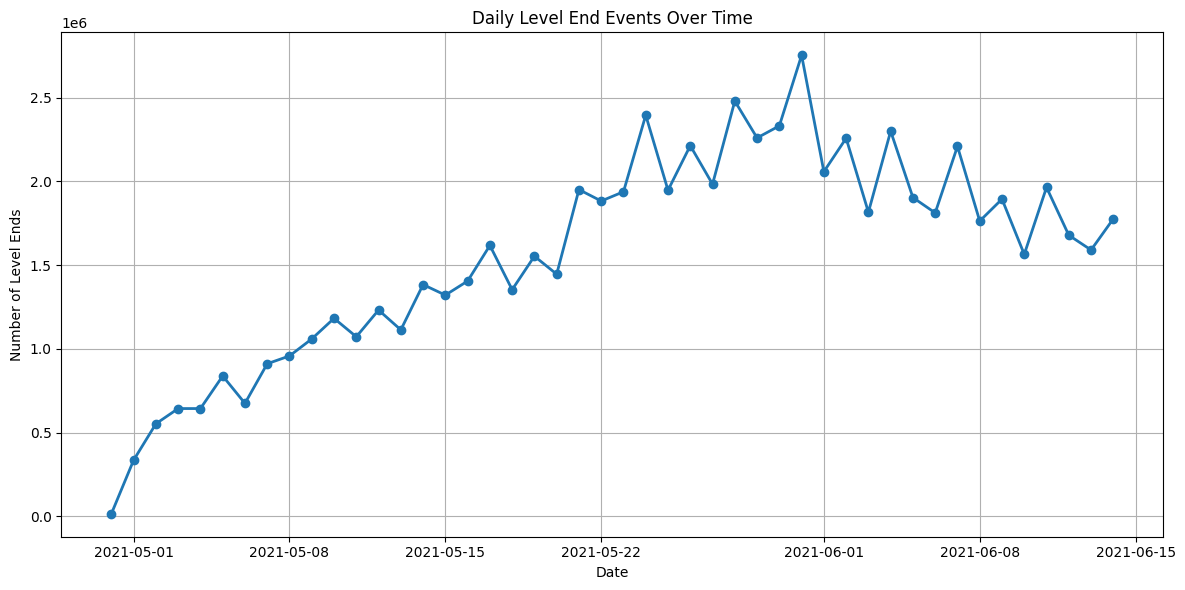

In [ ]:
# Convert 'level_end_date' to datetime and set as index for time series plotting
df_cot_2['level_end_date'] = pd.to_datetime(df_cot_2['level_end_date'])
df_cot_2.set_index('level_end_date', inplace=True)

# Plot the daily count of level end events as a time series
plt.figure(figsize=(12, 6))
plt.plot(df_cot_2.index, df_cot_2['daily_level_ends'], marker='o', linewidth=2)
plt.title('Daily Level End Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Level Ends')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
query_cot_3 = """
-- Calculate the total number of session events per day
-- Used to monitor user engagement trends over time

SELECT
  DATE(event_time) AS session_date,              -- Extract the date from session timestamps
  COUNT(*) AS daily_sessions                     -- Total session events recorded per day
FROM `case_db.q1_table_session`
GROUP BY session_date
ORDER BY session_date;

"""

In [ ]:
 df_cot_3 = conn.query(query_cot_3).to_dataframe()

In [ ]:
df_cot_3.head()

,session_date,daily_sessions
0,2021-04-30,812
1,2021-05-01,1224799
2,2021-05-02,2095090
3,2021-05-03,2494072
4,2021-05-04,2548911


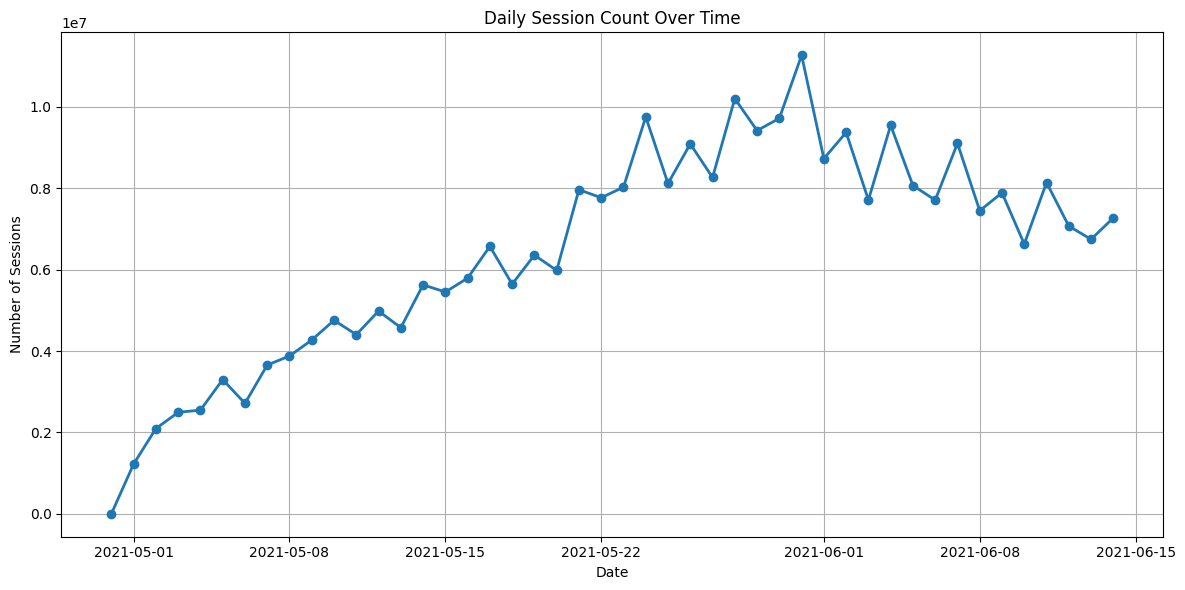

In [ ]:
# Convert 'session_date' to datetime and set it as the DataFrame index for time series plotting
df_cot_3['session_date'] = pd.to_datetime(df_cot_3['session_date'])
df_cot_3.set_index('session_date', inplace=True)

# Plot the daily session counts over time
plt.figure(figsize=(12, 6))
plt.plot(df_cot_3.index, df_cot_3['daily_sessions'], marker='o', linewidth=2)
plt.title('Daily Session Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sessions')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
query_cot_4 = """
-- Calculate total daily revenue from in-app purchases
-- Helps track monetization trends over time

SELECT
  DATE(event_time) AS revenue_date,                       -- Extract the date from revenue event timestamps
  SUM(CAST(revenue AS FLOAT64)) AS daily_revenue          -- Total revenue per day (cast to ensure numeric accuracy)
FROM `case_db.q1_table_revenue`
GROUP BY revenue_date
ORDER BY revenue_date;

"""

In [ ]:
 df_cot_4 = conn.query(query_cot_4).to_dataframe()

In [ ]:
df_cot_4.head()

,revenue_date,daily_revenue
0,2021-04-30,2.0
1,2021-05-01,313.0
2,2021-05-02,1418.0
3,2021-05-03,1871.0
4,2021-05-04,3003.0


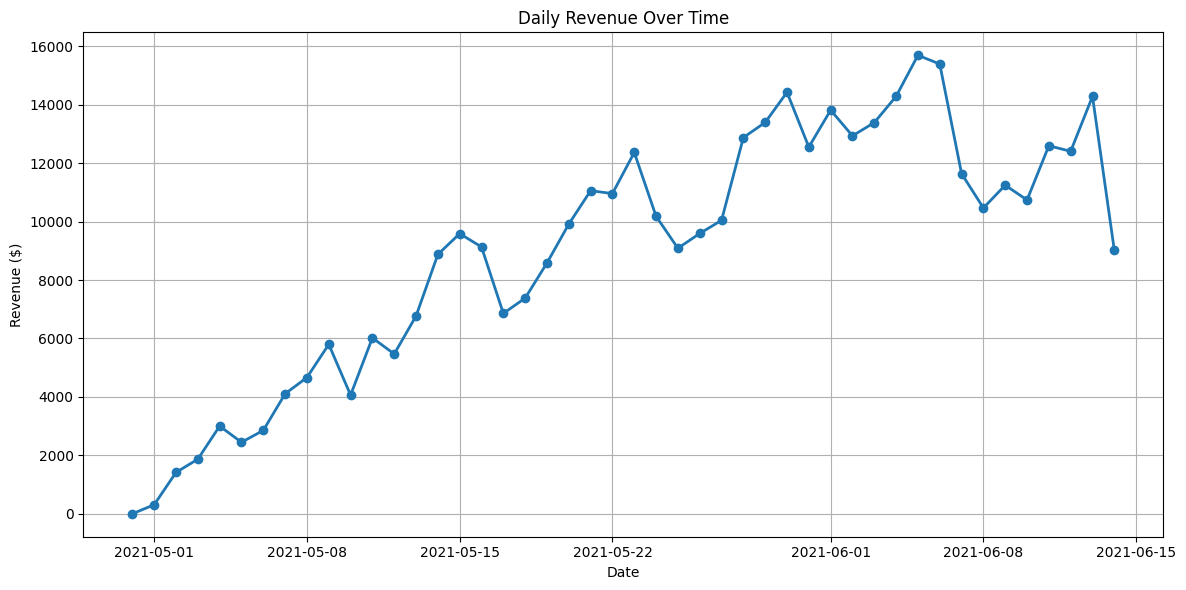

In [ ]:
# Convert 'revenue_date' column to datetime and set it as index for time-based plotting
df_cot_4['revenue_date'] = pd.to_datetime(df_cot_4['revenue_date'])
df_cot_4.set_index('revenue_date', inplace=True)

# Plot daily revenue as a time series
plt.figure(figsize=(12, 6))
plt.plot(df_cot_4.index, df_cot_4['daily_revenue'], marker='o', linewidth=2)
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
query_cot_5 = """
-- Calculate total daily marketing cost
-- Useful for tracking ad spend trends and campaign pacing

SELECT
  DATE(date) AS cost_date,                        -- Extract the date (already a date field in most cases)
  SUM(cost) AS daily_cost                         -- Total marketing cost per day
FROM `case_db.q1_table_cost`
GROUP BY cost_date
ORDER BY cost_date;

"""

In [ ]:
 df_cot_5 = conn.query(query_cot_5).to_dataframe()

In [ ]:
df_cot_5.head()

,cost_date,daily_cost
0,2021-05-01,43909.0
1,2021-05-02,42177.0
2,2021-05-03,34666.0
3,2021-05-04,33170.0
4,2021-05-05,37068.0


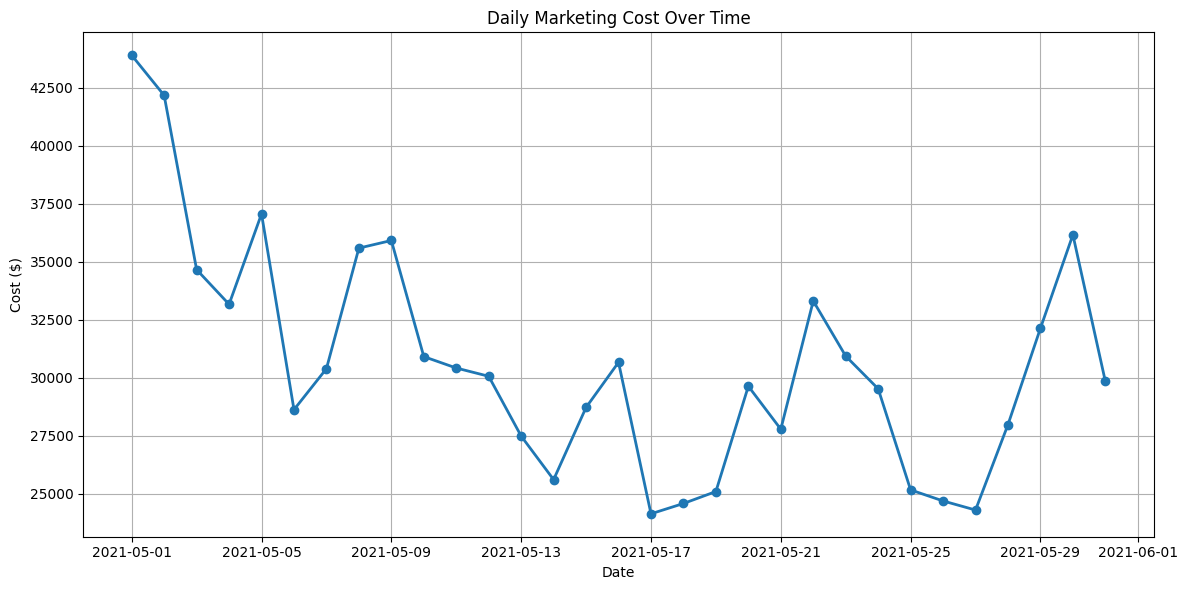

In [ ]:
# Convert 'cost_date' column to datetime and set it as index for plotting
df_cot_5['cost_date'] = pd.to_datetime(df_cot_5['cost_date'])
df_cot_5.set_index('cost_date', inplace=True)

# Plot daily marketing cost over time
plt.figure(figsize=(12, 6))
plt.plot(df_cot_5.index, df_cot_5['daily_cost'], marker='o', linewidth=2)
plt.title('Daily Marketing Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Cost ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Cumulative Analysis

#### What is it?
Cumulative analysis involves tracking the running total of a metric over time. It shows how values accumulate day by day, providing a sense of long-term progress or growth.

#### Why is it important?
Cumulative metrics are essential for:
- Understanding total performance (e.g., total installs, revenue, or cost to date)
- Identifying growth trends vs. stagnation
- Measuring sustained user engagement and monetization
- Supporting strategic decisions based on full-period insights rather than daily fluctuations

#### How is it measured?
Based on the provided SQL queries:

- **Cumulative Installs** (`query_ca_1`): Adds daily installs over time to show total user acquisition.
- **Cumulative Level Ends** (`query_ca_2`): Tracks total gameplay activity and progression.
- **Cumulative Sessions** (`query_ca_3`): Measures how overall user engagement increases across time.
- **Cumulative Revenue** (`query_ca_4`): Reflects total earnings from in-app purchases.
- **Cumulative Marketing Cost** (`query_ca_5`): Aggregates daily ad spend to show total marketing investment.

Each query uses a `SUM(...) OVER (ORDER BY date)` window function to calculate the cumulative value for the metric, providing a time-based view of continuous growth.


In [ ]:
query_ca_1 = """
-- Calculate cumulative installs over time
-- Tracks the total number of unique users acquired up to each date

SELECT
  install_date,
  daily_installs,
  SUM(daily_installs) OVER (ORDER BY install_date) AS cumulative_installs  -- Running total of daily installs
FROM (
  SELECT
    DATE(event_time) AS install_date,             -- Extract the date from install timestamp
    COUNT(DISTINCT user_id) AS daily_installs     -- Unique installs per day
  FROM `case_db.q1_table_install`
  GROUP BY install_date
) t
ORDER BY install_date;

"""

In [ ]:
 df_ca_1 = conn.query(query_ca_1).to_dataframe()

In [ ]:
df_ca_1.tail()

,daily_installs,cumulative_installs
install_date,,
2021-05-28,7400,192378
2021-05-29,8500,200878
2021-05-30,8818,209696
2021-05-31,6192,215888
2021-06-01,10,215898


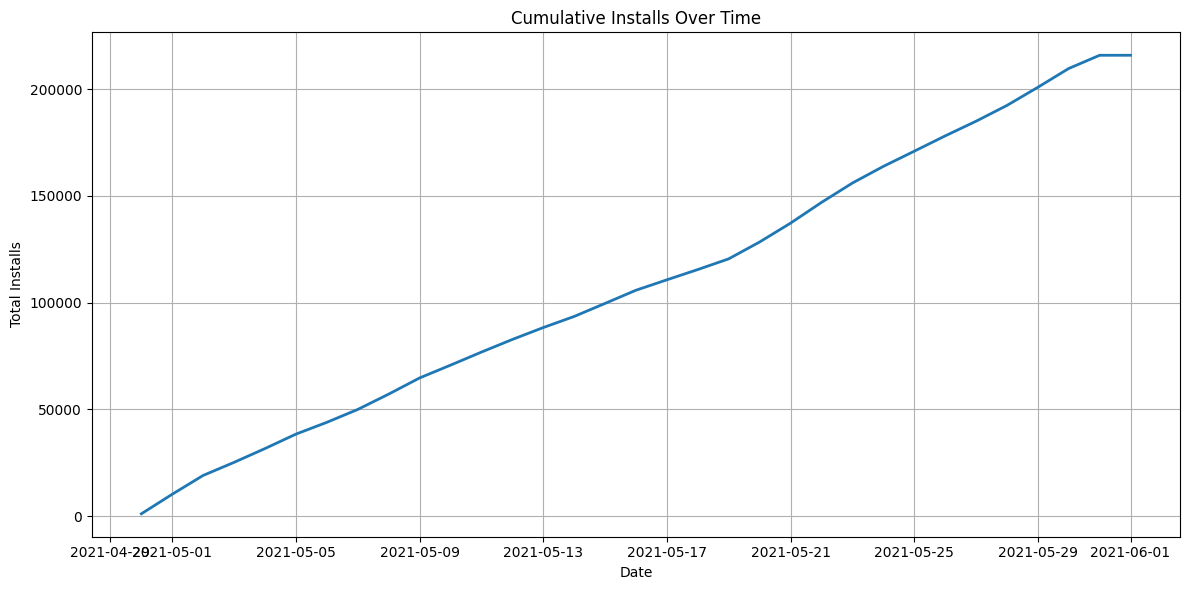

In [ ]:
# Convert 'install_date' to datetime and set it as the index for plotting
df_ca_1['install_date'] = pd.to_datetime(df_ca_1['install_date'])
df_ca_1.set_index('install_date', inplace=True)

# Plot cumulative installs as a time series
plt.figure(figsize=(12, 6))
plt.plot(df_ca_1.index, df_ca_1['cumulative_installs'], linewidth=2)
plt.title('Cumulative Installs Over Time')
plt.xlabel('Date')
plt.ylabel('Total Installs')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
query_ca_2 = """
-- Calculate cumulative level end events over time
-- Helps visualize total player progression activity across all dates

SELECT
  level_date,
  daily_level_ends,
  SUM(daily_level_ends) OVER (ORDER BY level_date) AS cumulative_level_ends  -- Running total of level ends
FROM (
  SELECT
    DATE(event_time) AS level_date,               -- Extract the date from level end event timestamp
    COUNT(*) AS daily_level_ends                  -- Total level end events per day
  FROM `case_db.q1_table_level_end`
  GROUP BY level_date
) t
ORDER BY level_date;

"""

In [ ]:
 df_ca_2 = conn.query(query_ca_2).to_dataframe()

In [ ]:
df_ca_2.tail()

,level_date,daily_level_ends,cumulative_level_ends
41,2021-06-10,1564659,65033895
42,2021-06-11,1964337,66998232
43,2021-06-12,1678883,68677115
44,2021-06-13,1590539,70267654
45,2021-06-14,1776720,72044374


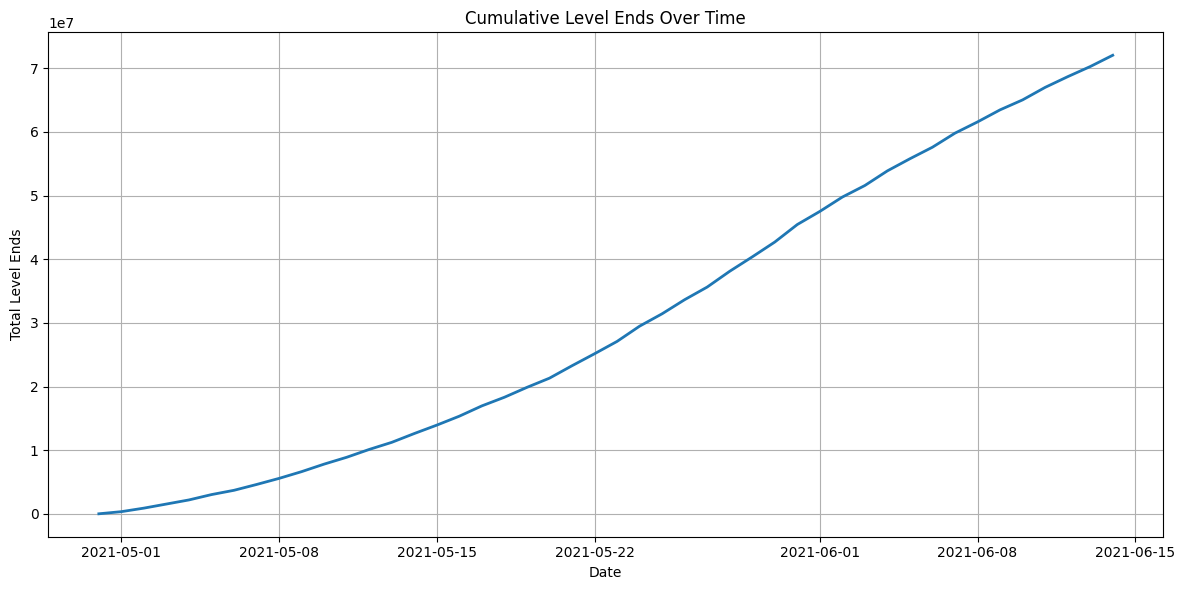

In [ ]:
# Convert 'level_date' to datetime and set it as the index for time series plotting
df_ca_2['level_date'] = pd.to_datetime(df_ca_2['level_date'])
df_ca_2.set_index('level_date', inplace=True)

# Plot cumulative level end events over time
plt.figure(figsize=(12, 6))
plt.plot(df_ca_2.index, df_ca_2['cumulative_level_ends'], linewidth=2)
plt.title('Cumulative Level Ends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Level Ends')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
query_ca_3 = """
-- Calculate cumulative session counts over time
-- Useful for understanding overall engagement growth across the app's lifetime

SELECT
  session_date,
  daily_sessions,
  SUM(daily_sessions) OVER (ORDER BY session_date) AS cumulative_sessions  -- Running total of sessions
FROM (
  SELECT
    DATE(event_time) AS session_date,             -- Extract the date from each session event
    COUNT(*) AS daily_sessions                    -- Count of session events per day
  FROM `case_db.q1_table_session`
  GROUP BY session_date
) t
ORDER BY session_date;

"""

In [ ]:
 df_ca_3 = conn.query(query_ca_3).to_dataframe()

In [ ]:
df_ca_3.tail()

,session_date,daily_sessions,cumulative_sessions
41,2021-06-10,6629236,268128869
42,2021-06-11,8141287,276270156
43,2021-06-12,7070990,283341146
44,2021-06-13,6746229,290087375
45,2021-06-14,7271483,297358858


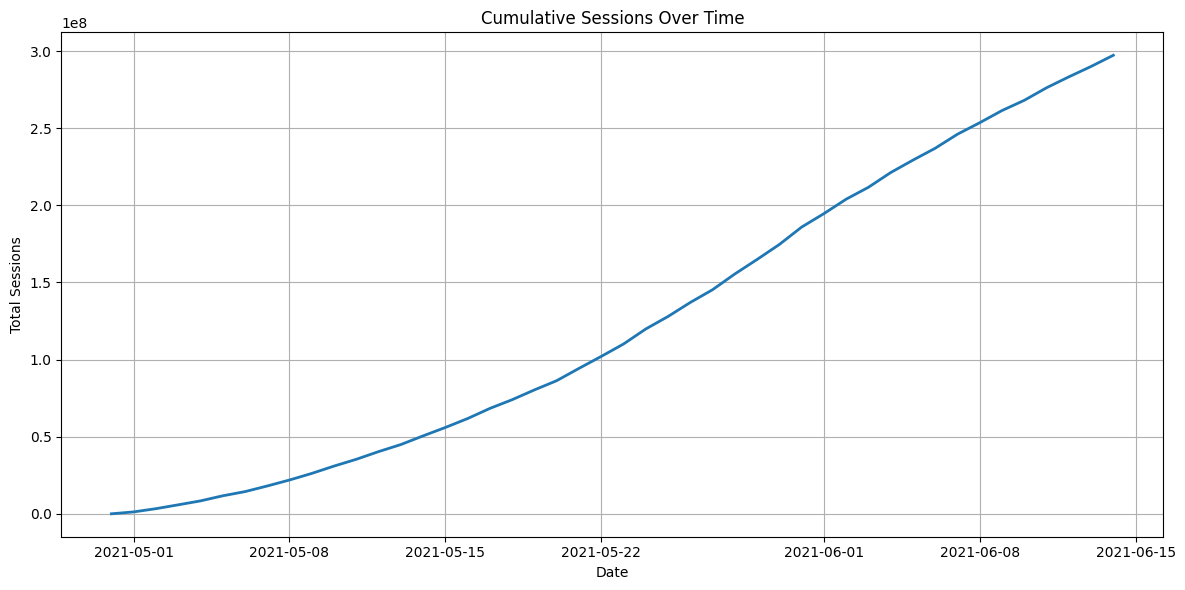

In [ ]:
# Convert 'session_date' to datetime format and set as index for time series plotting
df_ca_3['session_date'] = pd.to_datetime(df_ca_3['session_date'])
df_ca_3.set_index('session_date', inplace=True)

# Plot cumulative session count over time
plt.figure(figsize=(12, 6))
plt.plot(df_ca_3.index, df_ca_3['cumulative_sessions'], linewidth=2)
plt.title('Cumulative Sessions Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sessions')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
query_ca_4 = """
-- Calculate cumulative in-app revenue over time
-- Helps visualize monetization growth and revenue accumulation trends

SELECT
  revenue_date,
  daily_revenue,
  SUM(daily_revenue) OVER (ORDER BY revenue_date) AS cumulative_revenue  -- Running total revenue
FROM (
  SELECT
    DATE(event_time) AS revenue_date,                    -- Extract the date from revenue timestamps
    SUM(CAST(revenue AS FLOAT64)) AS daily_revenue       -- Total daily revenue, cast for numeric precision
  FROM `case_db.q1_table_revenue`
  GROUP BY revenue_date
) t
ORDER BY revenue_date;

"""

In [ ]:
 df_ca_4 = conn.query(query_ca_4).to_dataframe()

In [ ]:
df_ca_4.tail()

,revenue_date,daily_revenue,cumulative_revenue
41,2021-06-10,10738.0,365223.0
42,2021-06-11,12593.0,377816.0
43,2021-06-12,12404.0,390220.0
44,2021-06-13,14283.0,404503.0
45,2021-06-14,9017.0,413520.0


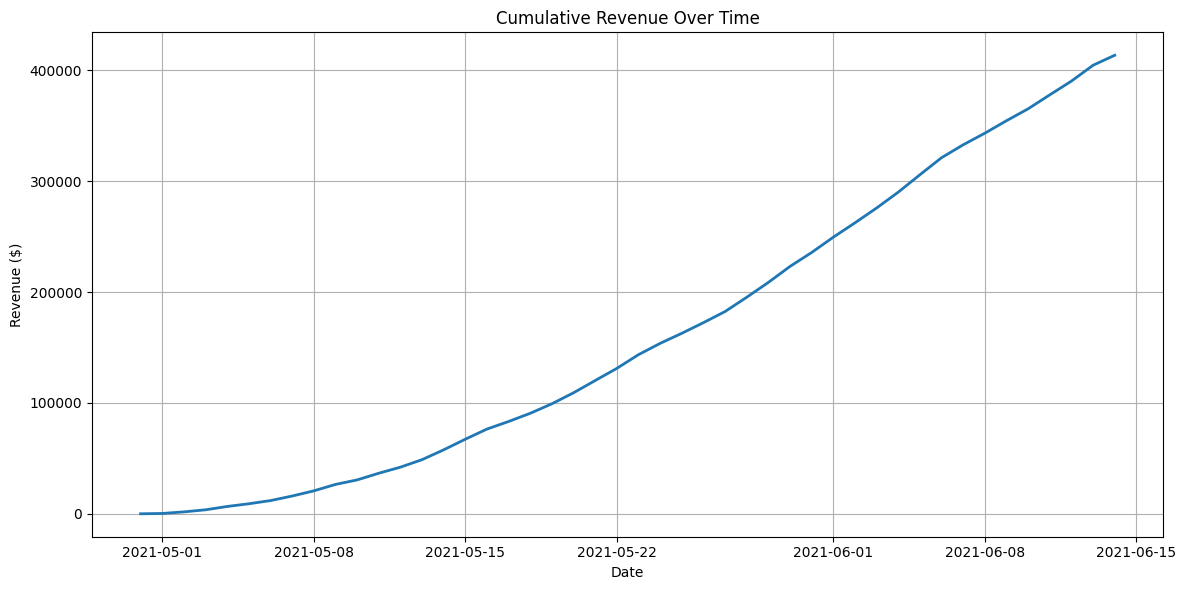

In [ ]:
# Convert 'revenue_date' to datetime and set it as the index for plotting
df_ca_4['revenue_date'] = pd.to_datetime(df_ca_4['revenue_date'])
df_ca_4.set_index('revenue_date', inplace=True)

# Plot cumulative revenue over time
plt.figure(figsize=(12, 6))
plt.plot(df_ca_4.index, df_ca_4['cumulative_revenue'], linewidth=2)
plt.title('Cumulative Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
query_ca_5 = """
-- Calculate cumulative marketing cost over time
-- Helps evaluate total ad spend and campaign pacing trends

SELECT
  cost_date,
  daily_cost,
  SUM(daily_cost) OVER (ORDER BY cost_date) AS cumulative_cost  -- Running total of daily costs
FROM (
  SELECT
    DATE(date) AS cost_date,                    -- Extract the date from the cost records
    SUM(cost) AS daily_cost                     -- Total marketing spend per day
  FROM `case_db.q1_table_cost`
  GROUP BY cost_date
) t
ORDER BY cost_date;

"""

In [ ]:
df_ca_5 = conn.query(query_ca_5).to_dataframe()

In [ ]:
df_ca_5.tail()

,daily_cost,cumulative_cost
cost_date,,
2021-05-27,24299.0,824596.0
2021-05-28,27982.0,852578.0
2021-05-29,32137.0,884715.0
2021-05-30,36168.0,920883.0
2021-05-31,29848.0,950731.0


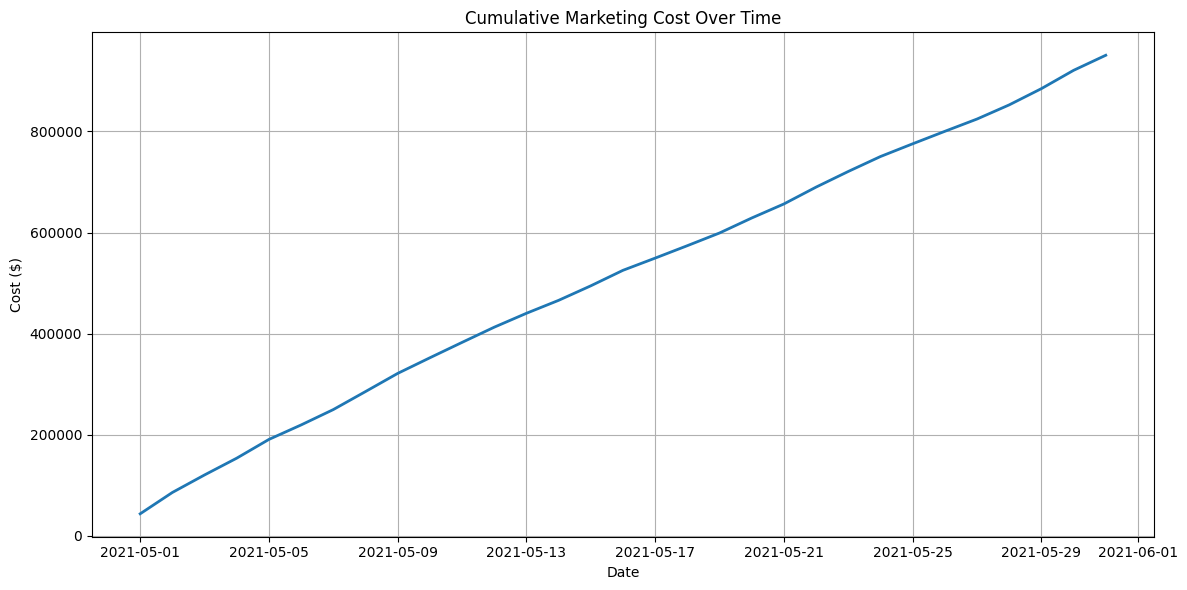

In [ ]:
# Convert 'cost_date' to datetime format and set as index for time series visualization
df_ca_5['cost_date'] = pd.to_datetime(df_ca_5['cost_date'])
df_ca_5.set_index('cost_date', inplace=True)

# Plot cumulative marketing cost over time
plt.figure(figsize=(12, 6))
plt.plot(df_ca_5.index, df_ca_5['cumulative_cost'], linewidth=2)
plt.title('Cumulative Marketing Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Cost ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Performance Analysis

#### What is it?
Performance Analysis evaluates how daily metrics perform relative to their cumulative average. It identifies whether a given day is above or below historical trends.

#### Why is it important?
This analysis is essential for:
- Spotting performance spikes or drops early
- Understanding deviations from the norm (positive or negative)
- Making timely, data-driven decisions to adjust marketing, engagement, or monetization strategies

#### How is it measured?
Each query calculates:
- A **daily value** (e.g., installs, sessions, revenue, cost)
- A **cumulative average** up to that day
- The **gap** between actual daily value and cumulative average

From the provided queries:

- **Installs** (`query_pa_1`): Tracks whether daily user acquisition is above or below average.
- **Level Ends** (`query_pa_2`): Highlights gameplay intensity or drop-off periods.
- **Sessions** (`query_pa_3`): Measures engagement consistency over time.
- **Revenue** (`query_pa_4`): Detects under- or over-performance in monetization.
- **Cost** (`query_pa_5`): Evaluates whether daily ad spend aligns with historical pacing.

This method uses window functions with `AVG(...) OVER (...)` to establish dynamic benchmarks for daily comparisons.


In [ ]:
query_pa_1 = """
-- Compare daily installs to their cumulative average over time
-- Useful for detecting trends, anomalies, and performance gaps in user acquisition

SELECT
  t.install_date,
  t.daily_installs,

  -- Running average of daily installs from start up to current date
  AVG(t.daily_installs) OVER (
    ORDER BY t.install_date
    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
  ) AS cumulative_avg_installs,

  -- Difference between actual installs and cumulative average for the same day
  t.daily_installs - AVG(t.daily_installs) OVER (
    ORDER BY t.install_date
    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
  ) AS install_gap

FROM (
  SELECT
    DATE(event_time) AS install_date,                   -- Extract date from install timestamp
    COUNT(DISTINCT user_id) AS daily_installs          -- Count unique installs per day
  FROM `case_db.q1_table_install`
  GROUP BY install_date
) AS t
ORDER BY t.install_date;

"""

In [ ]:
df_pa_1 = conn.query(query_pa_1).to_dataframe()

In [ ]:
df_pa_1.head()

,install_date,daily_installs,cumulative_avg_installs,install_gap
0,2021-04-30,1064,1064.00,0.00
1,2021-05-01,9177,5120.50,4056.50
2,2021-05-02,8803,6348.00,2455.00
3,2021-05-03,6127,6292.75,-165.75
4,2021-05-04,6467,6327.60,139.40


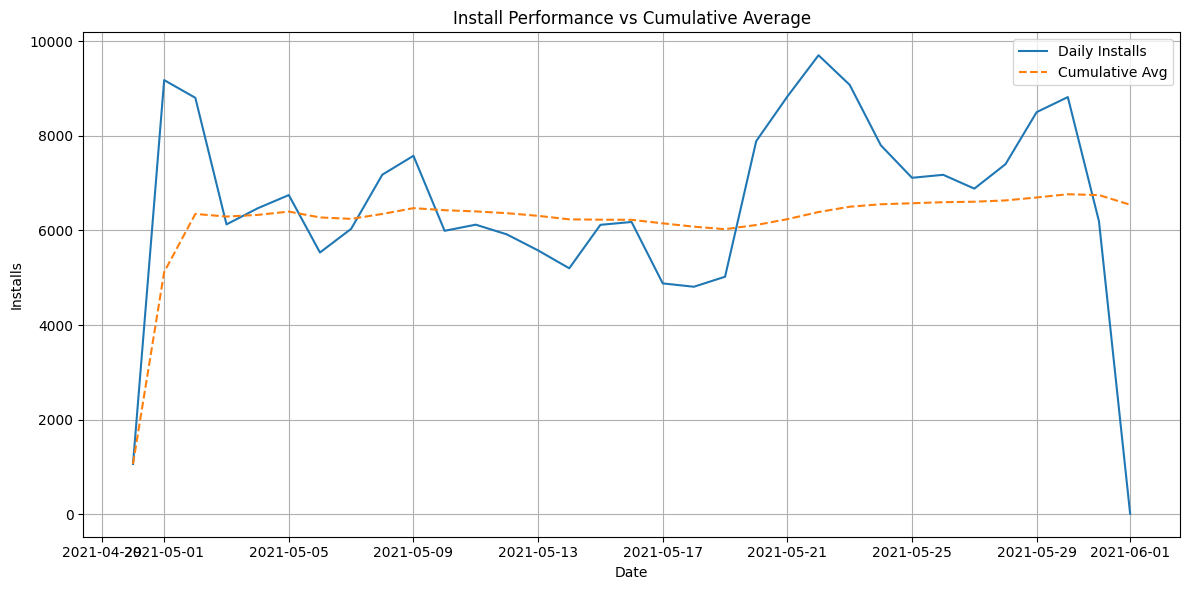

In [ ]:
# Convert install_date to datetime format for accurate plotting
df_pa_1['install_date'] = pd.to_datetime(df_pa_1['install_date'])

# Plot daily installs and their cumulative average over time
plt.figure(figsize=(12, 6))
plt.plot(df_pa_1['install_date'], df_pa_1['daily_installs'], label='Daily Installs')
plt.plot(df_pa_1['install_date'], df_pa_1['cumulative_avg_installs'], label='Cumulative Avg', linestyle='--')
plt.title('Install Performance vs Cumulative Average')
plt.xlabel('Date')
plt.ylabel('Installs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
query_pa_2 = """
-- Compare daily level end activity against its cumulative average
-- Helps identify periods of unusually high or low gameplay engagement

SELECT
  t.level_date,
  t.daily_level_ends,

  -- Running average of daily level end events
  AVG(t.daily_level_ends) OVER (
    ORDER BY t.level_date
    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
  ) AS cumulative_avg_level_ends,

  -- Difference between actual level ends and their cumulative average
  t.daily_level_ends - AVG(t.daily_level_ends) OVER (
    ORDER BY t.level_date
    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
  ) AS level_gap

FROM (
  SELECT
    DATE(event_time) AS level_date,              -- Extract the date from each level end event
    COUNT(*) AS daily_level_ends                 -- Total number of level end events per day
  FROM `case_db.q1_table_level_end`
  GROUP BY level_date
) AS t
ORDER BY t.level_date;

"""

In [ ]:
df_pa_2 = conn.query(query_pa_2).to_dataframe()

In [ ]:
df_pa_2.head()

,level_date,daily_level_ends,cumulative_avg_level_ends,level_gap
0,2021-04-30,16077,16077.000000,0.000000
1,2021-05-01,336360,176218.500000,160141.500000
2,2021-05-02,553376,301937.666667,251438.333333
3,2021-05-03,644212,387506.250000,256705.750000
4,2021-05-04,644176,438840.200000,205335.800000


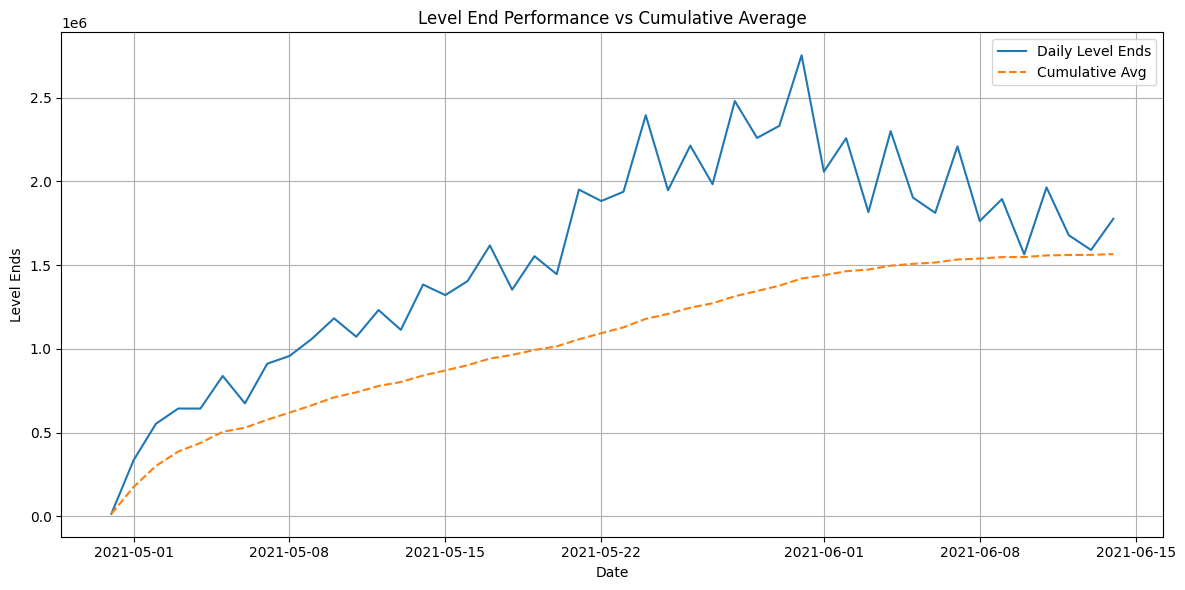

In [ ]:
# Convert 'level_date' to datetime for accurate x-axis handling
df_pa_2['level_date'] = pd.to_datetime(df_pa_2['level_date'])

# Plot daily level ends against the cumulative average to show trends and deviations
plt.figure(figsize=(12, 6))
plt.plot(df_pa_2['level_date'], df_pa_2['daily_level_ends'], label='Daily Level Ends')
plt.plot(df_pa_2['level_date'], df_pa_2['cumulative_avg_level_ends'], label='Cumulative Avg', linestyle='--')
plt.title('Level End Performance vs Cumulative Average')
plt.xlabel('Date')
plt.ylabel('Level Ends')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
query_pa_3 = """
-- Analyze session activity against its cumulative average over time
-- Highlights fluctuations in user engagement patterns

SELECT
  t.session_date,
  t.daily_sessions,

  -- Cumulative average of daily sessions up to each date
  AVG(t.daily_sessions) OVER (
    ORDER BY t.session_date
    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
  ) AS cumulative_avg_sessions,

  -- Difference between daily sessions and the cumulative average on that date
  t.daily_sessions - AVG(t.daily_sessions) OVER (
    ORDER BY t.session_date
    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
  ) AS session_gap

FROM (
  SELECT
    DATE(event_time) AS session_date,             -- Extract the date from each session record
    COUNT(*) AS daily_sessions                    -- Count of session events per day
  FROM `case_db.q1_table_session`
  GROUP BY session_date
) AS t
ORDER BY t.session_date;

"""

In [ ]:
df_pa_3 = conn.query(query_pa_3).to_dataframe()

In [ ]:
df_pa_3.head()

,session_date,daily_sessions,cumulative_avg_sessions,session_gap
0,2021-04-30,812,8.120000e+02,0.000000e+00
1,2021-05-01,1224799,6.128055e+05,6.119935e+05
2,2021-05-02,2095090,1.106900e+06,9.881897e+05
3,2021-05-03,2494072,1.453693e+06,1.040379e+06
4,2021-05-04,2548911,1.672737e+06,8.761742e+05


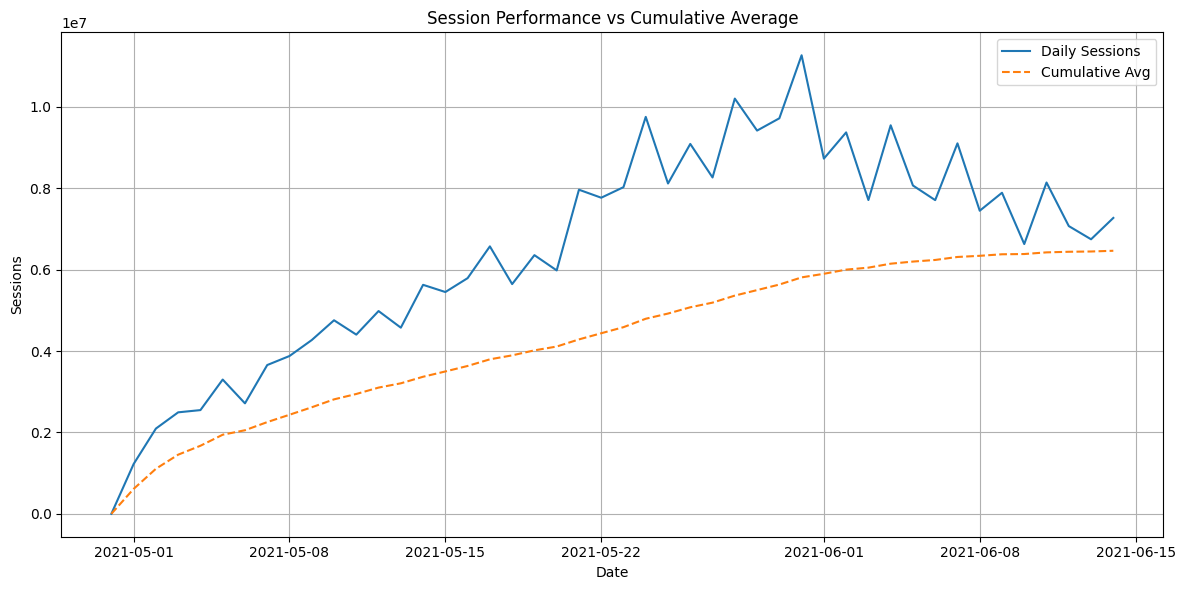

In [ ]:
# Convert 'session_date' to datetime format for time series plotting
df_pa_3['session_date'] = pd.to_datetime(df_pa_3['session_date'])

# Plot daily sessions alongside the cumulative average to detect engagement trends
plt.figure(figsize=(12, 6))
plt.plot(df_pa_3['session_date'], df_pa_3['daily_sessions'], label='Daily Sessions')
plt.plot(df_pa_3['session_date'], df_pa_3['cumulative_avg_sessions'], label='Cumulative Avg', linestyle='--')
plt.title('Session Performance vs Cumulative Average')
plt.xlabel('Date')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
query_pa_4 = """
-- Evaluate daily revenue performance against cumulative average
-- Identifies trends and deviations in monetization over time

SELECT
  t.revenue_date,
  t.daily_revenue,

  -- Running average of daily revenue up to each date
  AVG(t.daily_revenue) OVER (
    ORDER BY t.revenue_date
    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
  ) AS cumulative_avg_revenue,

  -- Difference between actual revenue and cumulative average on that date
  t.daily_revenue - AVG(t.daily_revenue) OVER (
    ORDER BY t.revenue_date
    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
  ) AS revenue_gap

FROM (
  SELECT
    DATE(event_time) AS revenue_date,                          -- Extract date from revenue timestamps
    SUM(CAST(revenue AS FLOAT64)) AS daily_revenue             -- Total revenue per day
  FROM `case_db.q1_table_revenue`
  GROUP BY revenue_date
) AS t
ORDER BY t.revenue_date;

"""

In [ ]:
df_pa_4 = conn.query(query_pa_4).to_dataframe()

In [ ]:
df_pa_4.head()

,revenue_date,daily_revenue,cumulative_avg_revenue,revenue_gap
0,2021-04-30,2.0,2.000000,0.000000
1,2021-05-01,313.0,157.500000,155.500000
2,2021-05-02,1418.0,577.666667,840.333333
3,2021-05-03,1871.0,901.000000,970.000000
4,2021-05-04,3003.0,1321.400000,1681.600000


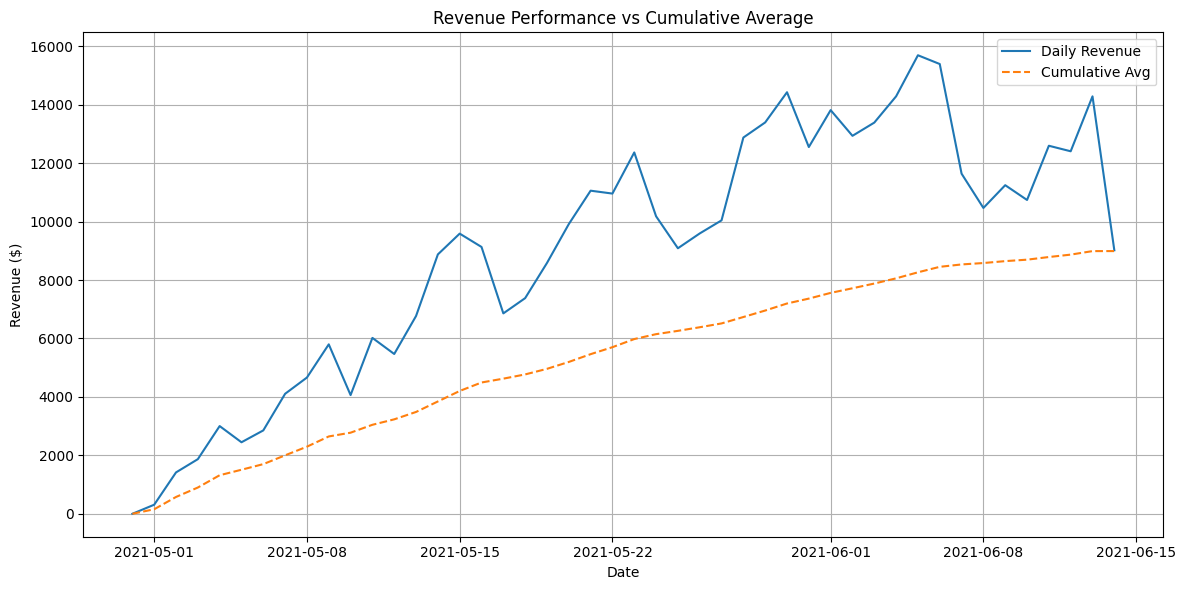

In [ ]:
# Convert 'revenue_date' to datetime format for time series plotting
df_pa_4['revenue_date'] = pd.to_datetime(df_pa_4['revenue_date'])

# Plot daily revenue and its cumulative average to highlight performance trends
plt.figure(figsize=(12, 6))
plt.plot(df_pa_4['revenue_date'], df_pa_4['daily_revenue'], label='Daily Revenue')
plt.plot(df_pa_4['revenue_date'], df_pa_4['cumulative_avg_revenue'], label='Cumulative Avg', linestyle='--')
plt.title('Revenue Performance vs Cumulative Average')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
query_pa_5 = """
-- Compare daily marketing cost to its cumulative average over time
-- Helps identify over- or under-spending trends in user acquisition campaigns

SELECT
  t.cost_date,
  t.daily_cost,

  -- Running average of daily costs up to and including each date
  AVG(t.daily_cost) OVER (
    ORDER BY t.cost_date
    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
  ) AS cumulative_avg_cost,

  -- Difference between actual daily cost and the cumulative average
  t.daily_cost - AVG(t.daily_cost) OVER (
    ORDER BY t.cost_date
    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
  ) AS cost_gap

FROM (
  SELECT
    DATE(date) AS cost_date,             -- Extract date from cost record
    SUM(cost) AS daily_cost              -- Total daily marketing spend
  FROM `case_db.q1_table_cost`
  GROUP BY cost_date
) AS t
ORDER BY t.cost_date;

"""

In [ ]:
df_pa_5 = conn.query(query_pa_5).to_dataframe()

In [ ]:
df_pa_5.head()

,cost_date,daily_cost,cumulative_avg_cost,cost_gap
0,2021-05-01,43909.0,43909.000000,0.000000
1,2021-05-02,42177.0,43043.000000,-866.000000
2,2021-05-03,34666.0,40250.666667,-5584.666667
3,2021-05-04,33170.0,38480.500000,-5310.500000
4,2021-05-05,37068.0,38198.000000,-1130.000000


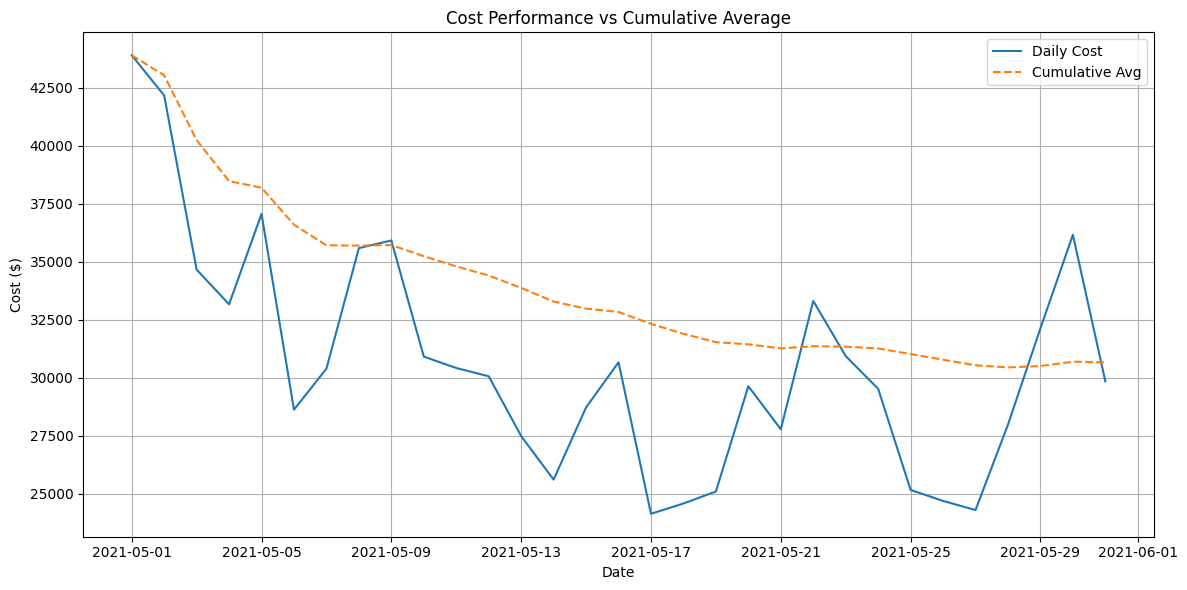

In [ ]:
# Convert 'cost_date' to datetime format for proper time series handling
df_pa_5['cost_date'] = pd.to_datetime(df_pa_5['cost_date'])

# Plot daily cost and its cumulative average to assess spend fluctuations
plt.figure(figsize=(12, 6))
plt.plot(df_pa_5['cost_date'], df_pa_5['daily_cost'], label='Daily Cost')
plt.plot(df_pa_5['cost_date'], df_pa_5['cumulative_avg_cost'], label='Cumulative Avg', linestyle='--')
plt.title('Cost Performance vs Cumulative Average')
plt.xlabel('Date')
plt.ylabel('Cost ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Part-to-Whole Analysis

#### What is it?
Part-to-Whole Analysis examines how individual components contribute to a total. It answers questions like: "Which segments are the biggest contributors?" and "What share does each category hold within the overall dataset?"

#### Why is it important?
This analysis is critical for:
- Prioritizing top-performing segments (e.g., countries, platforms, networks)
- Understanding market distribution and concentration
- Making strategic decisions about allocation of resources, campaigns, or product focus

#### How is it measured?
Each query calculates:
- The **value** of a specific category (e.g., installs, revenue, cost)
- The **percentage of the total** that the category represents

From the provided queries:

- **Installs by Country** (`query_ptw_1`): Reveals which countries contribute most to user acquisition.
- **Level End Status Distribution** (`query_ptw_2`): Shows how often players win, fail, or quit.
- **Sessions by Platform** (`query_ptw_3`): Highlights which platforms are most used (with typo correction for data quality).
- **Revenue by Package Type** (`query_ptw_4`): Identifies which monetization packages generate the most revenue.
- **Marketing Cost by Network** (`query_ptw_5`): Indicates where most ad spend is allocated.

These are calculated using standard SQL aggregations with `ROUND(... * 100.0 / SUM(...) OVER (), 2)` to derive percentage contributions.


In [ ]:
query_ptw_1 = """
-- Calculate the share of installs by country as a percentage of total installs
-- Useful for identifying top-performing markets by user acquisition

SELECT
  country,
  COUNT(DISTINCT user_id) AS installs,                       -- Total installs per country
  ROUND(COUNT(DISTINCT user_id) * 100.0 /
        SUM(COUNT(DISTINCT user_id)) OVER (), 2) AS percent_of_total  -- Country's share of total installs (as a %)
FROM `case_db.q1_table_install`
GROUP BY country
ORDER BY percent_of_total DESC;
"""

In [ ]:
df_ptw_1 = conn.query(query_ptw_1).to_dataframe()

In [ ]:
df_ptw_1

,country,installs,percent_of_total
0,Mercury,87198,40.54
1,Pluton,59513,27.67
2,Venus,56136,26.10
3,Saturn,7278,3.38
4,Uranus,4957,2.30


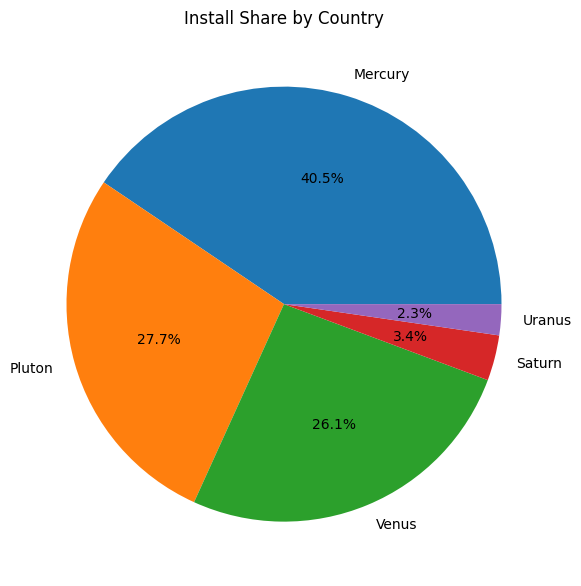

In [ ]:
# Create a pie chart to visualize each country's share of total installs
plt.figure(figsize=(6, 6))
plt.pie(df_ptw_1['percent_of_total'], labels=df_ptw_1['country'], autopct='%1.1f%%')
plt.title('Install Share by Country')
plt.tight_layout()
plt.show()

In [ ]:
query_ptw_2 = """
-- Analyze the distribution of level end events by status (e.g., win, fail, quit)
-- Calculates both the count and percentage share of each status type

SELECT
  status,
  COUNT(*) AS level_events,                                         -- Number of level end events per status
  ROUND(COUNT(*) * 100.0 /
        SUM(COUNT(*)) OVER (), 2) AS percent_of_total               -- Percentage share of each status type
FROM `case_db.q1_table_level_end`
GROUP BY status
ORDER BY percent_of_total DESC;

"""

In [ ]:
df_ptw_2 = conn.query(query_ptw_2).to_dataframe()

In [ ]:
df_ptw_2

,status,level_events,percent_of_total
0,fail,42494762,58.98
1,win,28698712,39.83
2,quit,850900,1.18


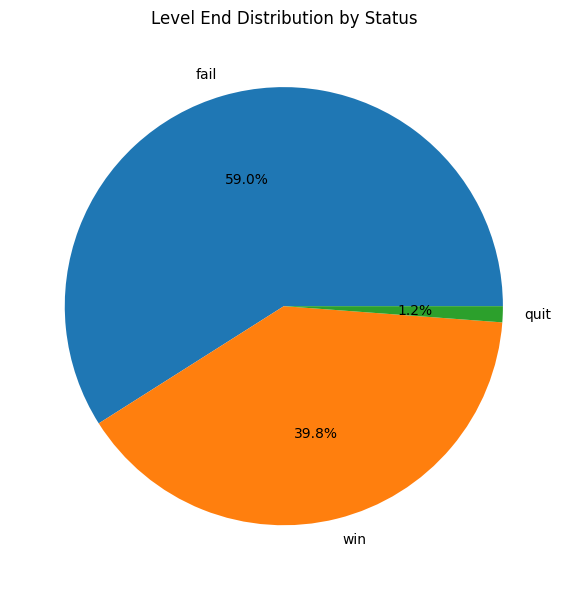

In [ ]:
# Create a pie chart to visualize the distribution of level end statuses
plt.figure(figsize=(6, 6))
plt.pie(df_ptw_2['percent_of_total'], labels=df_ptw_2['status'], autopct='%1.1f%%')
plt.title('Level End Distribution by Status')
plt.tight_layout()
plt.show()

In [ ]:
query_ptw_3 = """
-- Calculate session distribution by platform, correcting typos (e.g., 'andrgid' → 'android')
-- Shows both count and percentage share of sessions per platform

SELECT
  CASE
    WHEN LOWER(platform) = 'andrgid' THEN 'android'       -- Correct known typo in platform values
    ELSE LOWER(platform)
  END AS cleaned_platform,
  COUNT(*) AS session_count,                              -- Total number of sessions per platform
  ROUND(COUNT(*) * 100.0 /
        SUM(COUNT(*)) OVER (), 2) AS percent_of_total     -- Percentage share of total sessions
FROM `case_db.q1_table_session`
GROUP BY cleaned_platform
ORDER BY percent_of_total DESC;

"""

In [ ]:
df_ptw_3 = conn.query(query_ptw_3).to_dataframe()

In [ ]:
df_ptw_3

,cleaned_platform,session_count,percent_of_total
0,ios,168267028,56.59
1,android,129091822,43.41
2,None,8,0.00


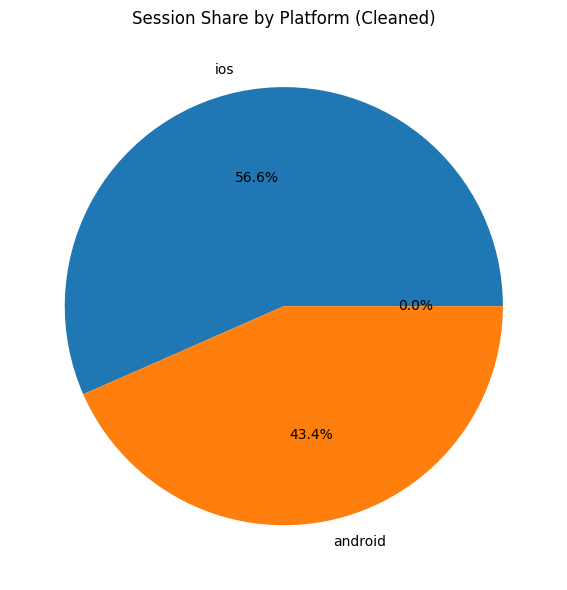

In [ ]:
# Plot session share by platform using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(df_ptw_3['percent_of_total'], labels=df_ptw_3['cleaned_platform'], autopct='%1.1f%%')
plt.title('Session Share by Platform (Cleaned)')
plt.tight_layout()
plt.show()

In [ ]:
query_ptw_4 = """
-- Calculate total revenue and its percentage share by package type
-- Useful for identifying top-performing monetization packages

SELECT
  package_type,
  SUM(CAST(revenue AS FLOAT64)) AS revenue,                         -- Total revenue for each package type
  ROUND(SUM(CAST(revenue AS FLOAT64)) * 100.0 /
        SUM(SUM(CAST(revenue AS FLOAT64))) OVER (), 2) AS percent_of_total  -- Share of total revenue
FROM `case_db.q1_table_revenue`
GROUP BY package_type
ORDER BY percent_of_total DESC;

"""

In [ ]:
df_ptw_4 = conn.query(query_ptw_4).to_dataframe()

In [ ]:
df_ptw_4

,package_type,revenue,percent_of_total
0,lovely_packs,237609.0,57.46
1,awesome_packs,147089.0,35.57
2,pretty_packs,27992.0,6.77
3,cool_packs,830.0,0.20


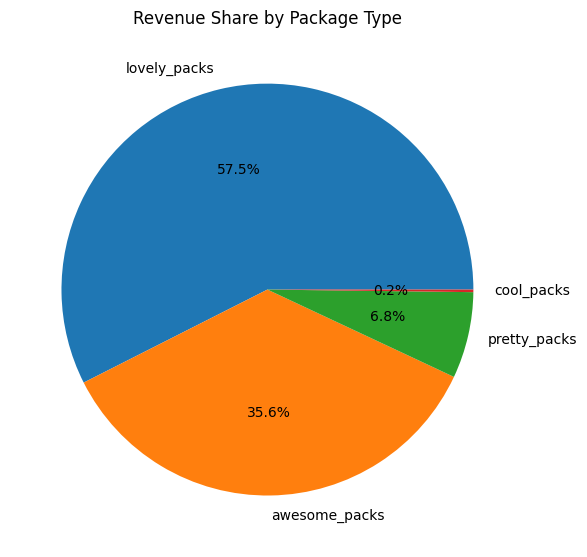

In [ ]:
# Plot revenue distribution by package type using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(df_ptw_4['percent_of_total'], labels=df_ptw_4['package_type'], autopct='%1.1f%%')
plt.title('Revenue Share by Package Type')
plt.tight_layout()
plt.show()

In [ ]:
query_ptw_5 = """
-- Calculate total marketing cost and its percentage share by ad network
-- Useful for identifying which networks account for the largest share of ad spend

SELECT
  network,
  SUM(cost) AS cost,                                              -- Total spend per network
  ROUND(SUM(cost) * 100.0 /
        SUM(SUM(cost)) OVER (), 2) AS percent_of_total            -- Share of total cost attributed to each network
FROM `case_db.q1_table_cost`
GROUP BY network
ORDER BY percent_of_total DESC;

"""

In [ ]:
df_ptw_5 = conn.query(query_ptw_5).to_dataframe()

In [ ]:
df_ptw_5

,network,cost,percent_of_total
0,Buzz,670052.0,70.48
1,Woody,190834.0,20.07
2,Sid,67168.0,7.06
3,Jessie,22677.0,2.39
4,Organic,0.0,0.00


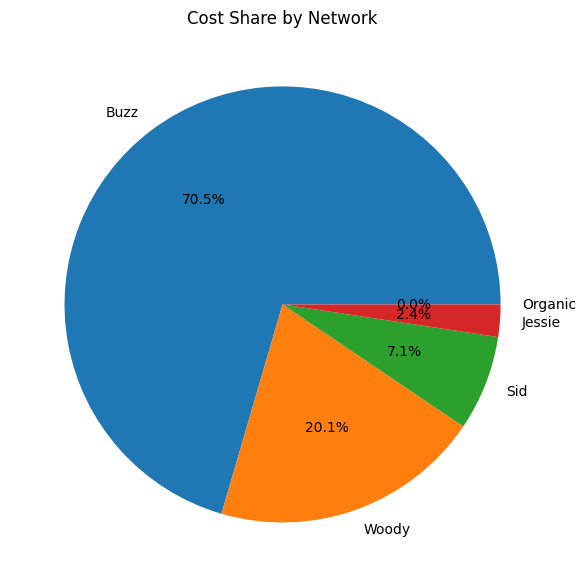

In [ ]:
# Plot marketing cost distribution by network as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(df_ptw_5['percent_of_total'], labels=df_ptw_5['network'], autopct='%1.1f%%')
plt.title('Cost Share by Network')
plt.tight_layout()
plt.show()

# Data Segmentation Analysis

#### What is it?
Data Segmentation Analysis involves dividing a dataset into subgroups based on value ranges (e.g., quartiles), and then analyzing behaviors or metrics within those segments.

#### Why is it important?
This analysis allows you to:
- Discover patterns hidden in aggregated data
- Compare performance across user, cost, or revenue segments
- Tailor strategies (e.g., targeting or pricing) to high- or low-performing groups

#### How is it measured?
Each query uses percentile-based segmentation (quartiles) to classify records into four groups (Q1 to Q4) based on value distribution. Metrics like average or count are then computed within those segments.

From the provided queries:

- **Time Spent vs. Moves Made** (`query_ds_1`): Segments users by how long they spent in a level and measures how many moves they made.
- **Time Spent vs. Coin Status** (`query_ds_2`): Examines how session duration correlates with coin accumulation/spending.
- **Revenue Segment Distribution** (`query_ds_3`): Groups purchases by revenue brackets to understand purchasing patterns.
- **Cost Segment Distribution** (`query_ds_4`): Analyzes the distribution of marketing costs across low to high cost tiers.

This approach reveals performance and behavior differences across data ranges, aiding in deeper, targeted analysis.


In [ ]:
query_ds_1 = """
-- Analyze the relationship between time spent and moves made in level end events
-- Segments users into quartiles based on time_spent and calculates average moves made per segment

WITH percentiles AS (
  SELECT
    -- Calculate 25th, 50th, and 75th percentiles of time_spent
    PERCENTILE_CONT(time_spent, 0.25) OVER () AS p25,
    PERCENTILE_CONT(time_spent, 0.5) OVER () AS p50,
    PERCENTILE_CONT(time_spent, 0.75) OVER () AS p75
  FROM `case_db.q1_table_level_end`
  WHERE time_spent IS NOT NULL
  LIMIT 1  -- Only need one row with percentile values
)

SELECT
  -- Assign each record to a time_spent quartile segment
  CASE
    WHEN le.time_spent <= p.p25 THEN 'Q1 (0–25%)'
    WHEN le.time_spent <= p.p50 THEN 'Q2 (25–50%)'
    WHEN le.time_spent <= p.p75 THEN 'Q3 (50–75%)'
    ELSE 'Q4 (75–100%)'
  END AS time_spend_segment,

  -- Calculate average number of moves made per segment
  AVG(le.moves_made) AS avg_moves_made

FROM `case_db.q1_table_level_end` le
JOIN percentiles p ON TRUE  -- Cross join to use percentile values
WHERE le.time_spent IS NOT NULL AND le.moves_made IS NOT NULL
GROUP BY time_spend_segment
ORDER BY time_spend_segment;

"""

In [ ]:
df_ds_1 = conn.query(query_ds_1).to_dataframe()

In [ ]:
df_ds_1

,time_spend_segment,avg_moves_made
0,Q1 (0–25%),24.549943
1,Q2 (25–50%),29.711268
2,Q3 (50–75%),31.630164
3,Q4 (75–100%),33.512622


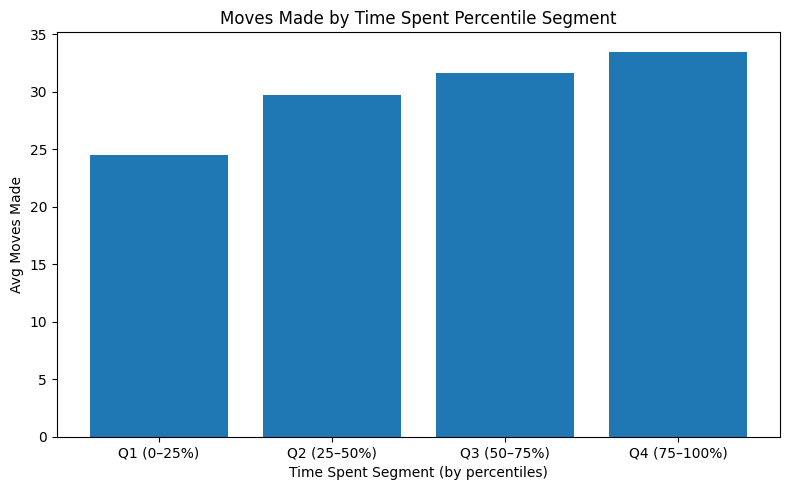

In [ ]:
# Plot average moves made per time_spent percentile segment
plt.figure(figsize=(8, 5))
plt.bar(df_ds_1['time_spend_segment'], df_ds_1['avg_moves_made'])
plt.xlabel('Time Spent Segment (by percentiles)')
plt.ylabel('Avg Moves Made')
plt.title('Moves Made by Time Spent Percentile Segment')
plt.tight_layout()
plt.show()

In [ ]:
query_ds_2 = """
-- Segment user sessions by time spent (using percentiles) and calculate the average coin_status for each segment
-- Useful for understanding how session duration correlates with user coin accumulation or spending

WITH percentiles AS (
  SELECT
    -- Compute the 25th, 50th, and 75th percentiles of time_spent across all sessions
    PERCENTILE_CONT(time_spent, 0.25) OVER () AS p25,
    PERCENTILE_CONT(time_spent, 0.5) OVER () AS p50,
    PERCENTILE_CONT(time_spent, 0.75) OVER () AS p75
  FROM `case_db.q1_table_session`
  WHERE time_spent IS NOT NULL
  LIMIT 1  -- Only need one row containing the computed percentiles
)

SELECT
  -- Assign each session to a percentile-based time segment
  CASE
    WHEN s.time_spent <= p.p25 THEN 'Q1 (0–25%)'
    WHEN s.time_spent <= p.p50 THEN 'Q2 (25–50%)'
    WHEN s.time_spent <= p.p75 THEN 'Q3 (50–75%)'
    ELSE 'Q4 (75–100%)'
  END AS time_segment,

  -- Calculate the average coin_status within each time segment
  AVG(s.coin_status) AS avg_coin_status

FROM `case_db.q1_table_session` s
JOIN percentiles p ON TRUE  -- Cross join to access percentile values
WHERE s.time_spent IS NOT NULL AND s.coin_status IS NOT NULL
GROUP BY time_segment
ORDER BY time_segment;

"""

In [ ]:
df_ds_2 = conn.query(query_ds_2).to_dataframe()

In [ ]:
df_ds_2

,time_segment,avg_coin_status
0,Q1 (0–25%),10959.361003
1,Q4 (75–100%),746.800000


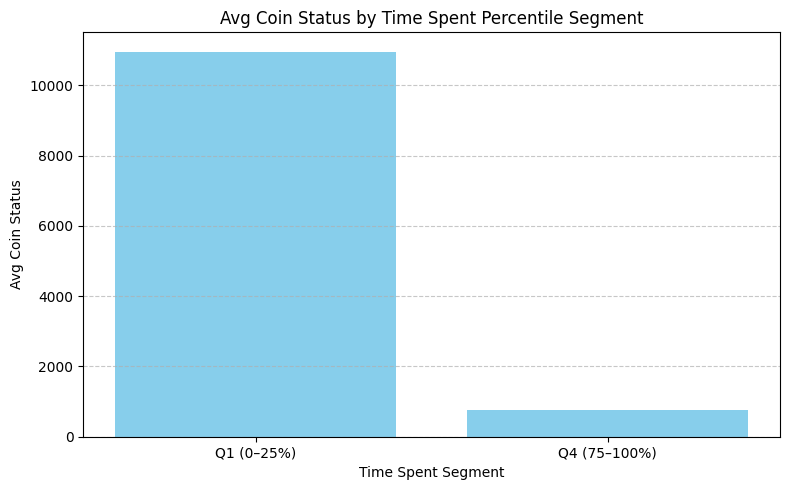

In [ ]:
# Plot average coin_status per session time percentile segment
plt.figure(figsize=(8, 5))
plt.bar(df_ds_2['time_segment'], df_ds_2['avg_coin_status'], color='skyblue')
plt.title('Avg Coin Status by Time Spent Percentile Segment')
plt.xlabel('Time Spent Segment')
plt.ylabel('Avg Coin Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
query_ds_3 = """
-- Segment purchases by revenue value using percentiles, then count purchases per segment
-- Helps understand how many purchases fall into low vs. high revenue brackets

WITH percentiles AS (
  SELECT
    -- Compute 25th, 50th, and 75th revenue percentiles across all valid revenue entries
    PERCENTILE_CONT(CAST(revenue AS FLOAT64), 0.25) OVER () AS p25,
    PERCENTILE_CONT(CAST(revenue AS FLOAT64), 0.5) OVER () AS p50,
    PERCENTILE_CONT(CAST(revenue AS FLOAT64), 0.75) OVER () AS p75
  FROM `case_db.q1_table_revenue`
  WHERE SAFE_CAST(revenue AS FLOAT64) IS NOT NULL
  LIMIT 1  -- One row is sufficient to hold the percentile values
)

SELECT
  -- Classify each revenue event into a percentile segment
  CASE
    WHEN CAST(r.revenue AS FLOAT64) <= p.p25 THEN 'Q1 (0–25%)'
    WHEN CAST(r.revenue AS FLOAT64) <= p.p50 THEN 'Q2 (25–50%)'
    WHEN CAST(r.revenue AS FLOAT64) <= p.p75 THEN 'Q3 (50–75%)'
    ELSE 'Q4 (75–100%)'
  END AS revenue_segment,

  -- Count how many purchases fall within each revenue segment
  COUNT(*) AS purchase_count

FROM `case_db.q1_table_revenue` r
JOIN percentiles p ON TRUE  -- Cross join to apply global percentiles
WHERE SAFE_CAST(r.revenue AS FLOAT64) IS NOT NULL
GROUP BY revenue_segment
ORDER BY revenue_segment;

"""

In [ ]:
df_ds_3 = conn.query(query_ds_3).to_dataframe()

In [ ]:
df_ds_3

,revenue_segment,purchase_count
0,Q1 (0–25%),34035
1,Q3 (50–75%),16691
2,Q4 (75–100%),14226


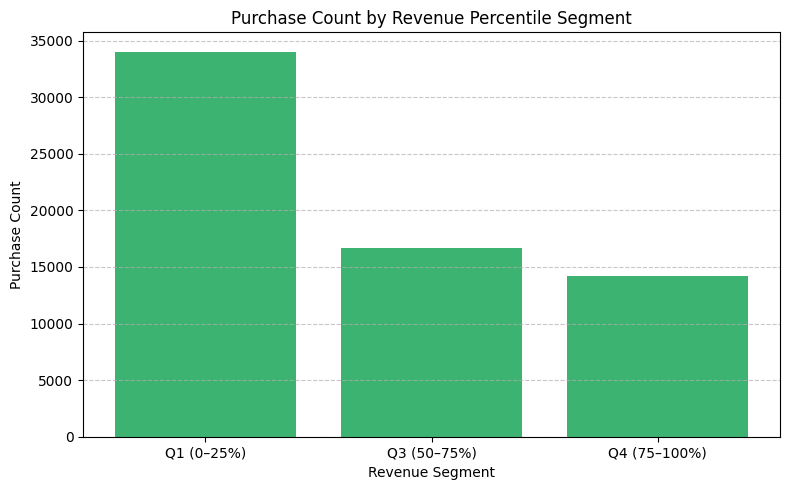

In [ ]:
# Plot the number of purchases in each revenue percentile segment
plt.figure(figsize=(8, 5))
plt.bar(df_ds_3['revenue_segment'], df_ds_3['purchase_count'], color='mediumseagreen')
plt.title('Purchase Count by Revenue Percentile Segment')
plt.xlabel('Revenue Segment')
plt.ylabel('Purchase Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
query_ds_4 = """
-- Segment cost entries into quartiles based on their value
-- Helps analyze the distribution of cost records across spending ranges

WITH percentiles AS (
  SELECT
    -- Calculate the 25th, 50th, and 75th percentile values for the 'cost' field
    PERCENTILE_CONT(cost, 0.25) OVER () AS p25,
    PERCENTILE_CONT(cost, 0.5) OVER () AS p50,
    PERCENTILE_CONT(cost, 0.75) OVER () AS p75
  FROM `case_db.q1_table_cost`
  WHERE cost IS NOT NULL
  LIMIT 1  -- Single row used to hold all percentile thresholds
)

SELECT
  -- Assign each cost value to its respective quartile segment
  CASE
    WHEN cost <= p.p25 THEN 'Q1 (0–25%)'
    WHEN cost <= p.p50 THEN 'Q2 (25–50%)'
    WHEN cost <= p.p75 THEN 'Q3 (50–75%)'
    ELSE 'Q4 (75–100%)'
  END AS cost_segment,

  -- Count number of records in each cost segment
  COUNT(*) AS count

FROM `case_db.q1_table_cost` c
JOIN percentiles p ON TRUE  -- Cross join to apply the global percentiles
WHERE cost IS NOT NULL
GROUP BY cost_segment
ORDER BY cost_segment;

"""

In [ ]:
df_ds_4 = conn.query(query_ds_4).to_dataframe()

In [ ]:
df_ds_4

,cost_segment,count
0,Q1 (0–25%),744
1,Q3 (50–75%),274
2,Q4 (75–100%),339


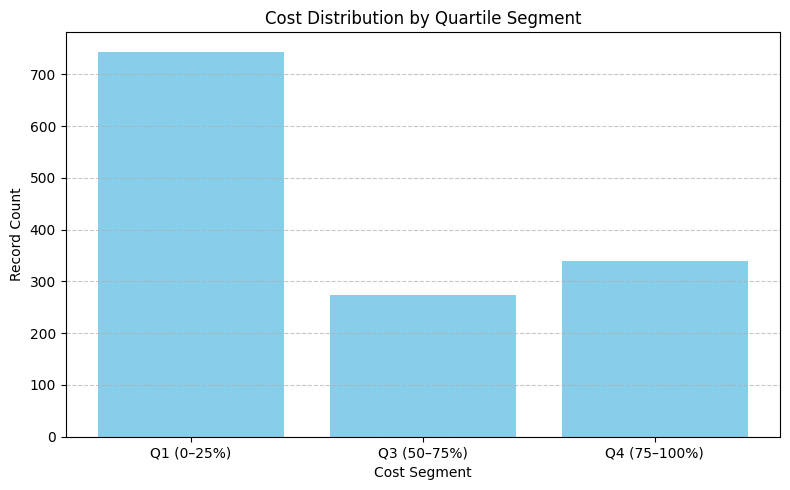

In [ ]:
# Plot the number of cost records in each quartile segment
plt.figure(figsize=(8, 5))
plt.bar(df_ds_4['cost_segment'], df_ds_4['count'], color='skyblue')
plt.title('Cost Distribution by Quartile Segment')
plt.xlabel('Cost Segment')
plt.ylabel('Record Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()